# Fitting ASCENDS Line Experimental Data

Data originally reported in Long, D., et al., Frequency-agile, rapid scanning cavity ring-down spectroscopy (FARS-CRDS) measurements of the (30012)←(00001) near-infrared carbon dioxide band. Journal of Quantitative Spectroscopy and Radiative Transfer, 2015. 161: p. 35-40.  Fitting of this data is used in the Adkins and Hodges, Assessment of the precision, bias and numerical correlation of fitted parameters obtained by multi-spectrum fits of the Hartmann-Tran line profile to simulated spectra, JQSRT (under review).

This script shows the fitting of real experimental data.  This data has a non-zero baseline and several etalons that need to be considered in order to effectively fit the spectra.  In addition to fitting the experimental spectra, this example also uses simulations to explore the anticipated impact of improving the SNR of the data and increasing the pressure range of the dataset.  


In [1]:
import numpy as np
import pandas as pd
import os, sys
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

import MATS

import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context("poster")


HAPI version: 1.1.1.0
To get the most up-to-date version please check http://hitran.org/hapi
ATTENTION: Python versions of partition sums from TIPS-2017 are now available in HAPI code

           It is free to use HAPI. If you use HAPI in your research or software development,
           please cite it using the following reference:
           R.V. Kochanov, I.E. Gordon, L.S. Rothman, P. Wcislo, C. Hill, J.S. Wilzewski,
           HITRAN Application Programming Interface (HAPI): A comprehensive approach
           to working with spectroscopic data, J. Quant. Spectrosc. Radiat. Transfer 177, 15-30 (2016)
           DOI: 10.1016/j.jqsrt.2016.03.005


## Define Spectrum Instances

The experimental spectra and the linelists are read-in in the same manner as described in the Experimental spectra example.  In this example three etalons are included in the simulation and linear baseine is considered for each spectrum in the dataset.  These fits also make use of the segment column, which allows the spectrum-specific parameters (baseline, etalons) to be treated on smaller segments of the spectrum, opposed to across the whole spectrum.  This is especially useful for treatment of faster etalons, which may not maintain a consistent phase over entire spectrum.  Additional constraints can be imposed help with fit convergence and physical modeling. 




In [2]:
from MATS.linelistdata import linelistdata
import MATS.hapi as hapi

In [3]:
#Generic Fit Parameters
wave_range = 1.5 #range outside of experimental x-range to simulate
IntensityThreshold = 1e-30 #intensities must be above this value to be simulated
Fit_Intensity = 1e-23 #intensities must be above this value for the line to be fit
order_baseline_fit = 1
tau_column = 'Alpha' # Mean tau/us
freq_column = 'Wavenumber' # Total Frequency /MHz
pressure_column = 'Pressure'
temperature_column = 'Temperature'
tau_stats_column = None


PARAM_LINELIST = linelistdata['JQSRT2021_SDNGP_2015']
PARAM_LINELIST.loc[PARAM_LINELIST['n_delta0_air'].isna(), 'n_delta0_air'] = 0
etalons = {1:[0.004321,1.168], 2:[0.001377, 59.38], 3:[0.0004578, 29.75]}


spec_1 = MATS.Spectrum('spectrum_CO2_Air_1%Ar_56Torr_03_formatted_R16e',  molefraction = {2:0.0004254}, natural_abundance = True, diluent = 'air',
                                etalons = etalons,
                                baseline_order = order_baseline_fit, segment_column = 'Segment',
                                input_freq = False, frequency_column = freq_column,
                                input_tau = False, tau_column = tau_column, tau_stats_column = tau_stats_column, 
                                pressure_column = pressure_column, temperature_column = temperature_column, 
                                nominal_temperature = 296, x_shift = 0.00)


spec_2 = MATS.Spectrum('spectrum_CO2_Air_1%Ar_83Torr_02_formatted_R16e',  molefraction = {2:0.0004254}, natural_abundance = True, diluent = 'air',
                                etalons = etalons,
                                baseline_order = order_baseline_fit, segment_column = 'Segment',
                                input_freq = False, frequency_column = freq_column,
                                input_tau = False, tau_column = tau_column, tau_stats_column = tau_stats_column, 
                                pressure_column = pressure_column, temperature_column = temperature_column, 
                                nominal_temperature = 296, x_shift = 0.00)

spec_3 = MATS.Spectrum('spectrum_CO2_Air_1%Ar_101Torr_01_formatted_R16e',  molefraction = {2:0.0004254}, natural_abundance = True, diluent = 'air',
                                etalons = etalons,
                                baseline_order = order_baseline_fit, segment_column = 'Segment',
                                input_freq = False, frequency_column = freq_column,
                                input_tau = False, tau_column = tau_column, tau_stats_column = tau_stats_column, 
                                pressure_column = pressure_column, temperature_column = temperature_column, 
                                nominal_temperature = 296, x_shift = 0.00)

spec_4 = MATS.Spectrum('spectrum_CO2_Air_1%Ar_109Torr_03_formatted_R16e',  molefraction = {2:0.0004254}, natural_abundance = True, diluent = 'air',
                                  etalons = etalons,
                                baseline_order = order_baseline_fit, segment_column = 'Segment',
                                input_freq = False, frequency_column = freq_column,
                                input_tau = False, tau_column = tau_column, tau_stats_column = tau_stats_column, 
                                pressure_column = pressure_column, temperature_column = temperature_column, 
                                nominal_temperature = 296, x_shift = 0.00)

spec_5 = MATS.Spectrum('spectrum_CO2_Air_1%Ar_152Torr_01_formatted_R16e',  molefraction = {2:0.0004254}, natural_abundance = True, diluent = 'air',
                                etalons = etalons,
                                baseline_order = order_baseline_fit, segment_column = 'Segment',
                                input_freq = False, frequency_column = freq_column,
                                input_tau = False, tau_column = tau_column, tau_stats_column = tau_stats_column, 
                                pressure_column = pressure_column, temperature_column = temperature_column, 
                                nominal_temperature = 296, x_shift = 0.00)

spec_6 = MATS.Spectrum('spectrum_CO2_Air_1%Ar_186Torr_03_formatted_R16e',  molefraction = {2:0.0004254}, natural_abundance = True, diluent = 'air',
                                etalons = etalons,
                                baseline_order = order_baseline_fit, segment_column = 'Segment',
                                input_freq = False, frequency_column = freq_column,
                                input_tau = False, tau_column = tau_column, tau_stats_column = tau_stats_column, 
                                pressure_column = pressure_column, temperature_column = temperature_column, 
                                nominal_temperature = 296, x_shift = 0.00)

spec_7 = MATS.Spectrum('spectrum_CO2_Air_1%Ar_269Torr_01_formatted_R16e',  molefraction = {2:0.0004254}, natural_abundance = True, diluent = 'air',
                                etalons = etalons,
                                baseline_order = order_baseline_fit, segment_column = 'Segment',
                                input_freq = False, frequency_column = freq_column,
                                input_tau = False, tau_column = tau_column, tau_stats_column = tau_stats_column, 
                                pressure_column = pressure_column, temperature_column = temperature_column, 
                                nominal_temperature = 296, x_shift = 0.00)

spec_8 = MATS.Spectrum('spectrum_CO2_Air_1%Ar_271Torr_03_formatted_R16e',  molefraction = {2:0.0004254}, natural_abundance = True, diluent = 'air',
                                etalons = etalons,
                                baseline_order = order_baseline_fit, segment_column = 'Segment',
                                input_freq = False, frequency_column = freq_column,
                                input_tau = False, tau_column = tau_column, tau_stats_column = tau_stats_column, 
                                pressure_column = pressure_column, temperature_column = temperature_column, 
                                nominal_temperature = 296, x_shift = 0.00)




SPECTRA = MATS.Dataset([spec_1, spec_2, spec_3, spec_4, spec_5, spec_6, spec_7, spec_8], 'MATS_Example',PARAM_LINELIST)


## Generate Fit Parameter Files

The baseline and parameter fit parameter files are generated.  In this example, the line intensity is allowed to float for each spectrum, but all other line shape parameters are constrained to their pressure dependence.  In the Long et al. fixed the beyond Voigt SDNGP line shape parameters to those reported by Lin, H., et al., Cavity ring-down spectrometer for high-fidelity molecular absorption measurements. Journal of Quantitative Spectroscopy and Radiative Transfer, 2015. 161: p. 11-20, while allowing the VP parameters and line mixing to float.  In this example, we are allowing all SDNGP parameters to float using the Lin et al. values as the initial guess, but only considering spectra in the isolated transition pressure regime, where line mixing can be ignored.  

The slope and intercept for the baseline of each spectra are floated, along with the amplitude, period, and phase of each etalon.  Because this example uses the segment function, you can see that each spectrum has 4 segments, so the number of rows in the baseline fit parameter list is four times larger than the number of spectra.  Additional constraints will be added to the etalon parameters in the next section.  

In [4]:
#Generate Baseline Parameter list based on number of etalons in spectra definitions and baseline order
BASE_LINELIST = SPECTRA.generate_baseline_paramlist()

FITPARAMS = MATS.Generate_FitParam_File(SPECTRA, PARAM_LINELIST, BASE_LINELIST, lineprofile = 'SDNGP', linemixing = False, 
                                          fit_intensity = Fit_Intensity, threshold_intensity = IntensityThreshold, sim_window = wave_range,
                                          nu_constrain = True, sw_constrain = False, gamma0_constrain = True, delta0_constrain = True, 
                                           aw_constrain = True, as_constrain = True, 
                                           nuVC_constrain = True, eta_constrain =True, linemixing_constrain = True,
                                            additional_columns = ['local_lower_quanta'])

FITPARAMS.generate_fit_param_linelist_from_linelist(vary_nu = {2:{1:True}}, vary_sw = {2:{1:True}},
                                                 vary_gamma0 = {2:{1: True}},
                                                 vary_delta0 = {2:{1: True}},
                                                 vary_aw = {2:{1: True}},
                                                 vary_as = {2:{1: True}},
                                                 vary_nuVC = {2:{1:True}},
                                                 vary_eta = {}, vary_linemixing = {2:{1:False}})
FITPARAMS.generate_fit_baseline_linelist(vary_baseline = True, vary_molefraction = {2:False}, vary_pressure = False, vary_temperature = False, vary_xshift = False, 
                                        vary_etalon_amp= True, vary_etalon_period= True, vary_etalon_phase= True)


,Segment Number,Pressure,Pressure_err,Pressure_vary,Temperature,Temperature_err,Temperature_vary,baseline_a,baseline_a_err,baseline_a_vary,...,etalon_3_period_vary,etalon_3_phase,etalon_3_phase_err,etalon_3_phase_vary,molefraction_CO2,molefraction_CO2_err,molefraction_CO2_vary,x_shift,x_shift_err,x_shift_vary
Spectrum Number,,,,,,,,,,,,,,,,,,,,,
1.0,0.0,0.073747,0,False,296.275731,0,False,0.0,0,True,...,True,0.0,0,True,0.000425,0,False,0.0,0,False
1.0,1.0,0.073747,0,False,296.275731,0,False,0.0,0,True,...,True,0.0,0,True,0.000425,0,False,0.0,0,False
1.0,2.0,0.073747,0,False,296.275731,0,False,0.0,0,True,...,True,0.0,0,True,0.000425,0,False,0.0,0,False
1.0,3.0,0.073747,0,False,296.275731,0,False,0.0,0,True,...,True,0.0,0,True,0.000425,0,False,0.0,0,False
2.0,0.0,0.109482,0,False,296.318849,0,False,0.0,0,True,...,True,0.0,0,True,0.000425,0,False,0.0,0,False
2.0,1.0,0.109482,0,False,296.318849,0,False,0.0,0,True,...,True,0.0,0,True,0.000425,0,False,0.0,0,False
2.0,2.0,0.109482,0,False,296.318849,0,False,0.0,0,True,...,True,0.0,0,True,0.000425,0,False,0.0,0,False
2.0,3.0,0.109482,0,False,296.318849,0,False,0.0,0,True,...,True,0.0,0,True,0.000425,0,False,0.0,0,False
3.0,0.0,0.132529,0,False,296.337066,0,False,0.0,0,True,...,True,0.0,0,True,0.000425,0,False,0.0,0,False


## Fit Dataset

The fitting of the dataset is looped to iterate on the fit results.  The result and residual plots are shown after each iteration.  In the first few iterations not all of the etalons are well modeled leading to systematic residuals, iterating on the best fit results helps better model the etalons minimizing the residauls.

Using the segments in a spectrum, allows us to model the spectrum specific parameters by segment opposed to across the whole spectrum.  However, this flexibility can lead to divergent solutions if additional constraints aren't included.  This example will constrain these parameters using the constrained baseline function and by setting constraits directly in the lmfit parameter dictionary.  The constrained baseline function indicates the baseline parameters that should be constrained to be equal across the entire spectrum (parameters that won't take advantage of the segment structure).  For this example the baseline and etalon periods are constrained to be equal equal across the entire spectrum.  

This example also sets a few additional constraints on the etalons.  First, the period of each etalon is set to be equal across all spectra in the dataset.  Second, the phase of the first etalon is constrained to be equal across each spectrum.   



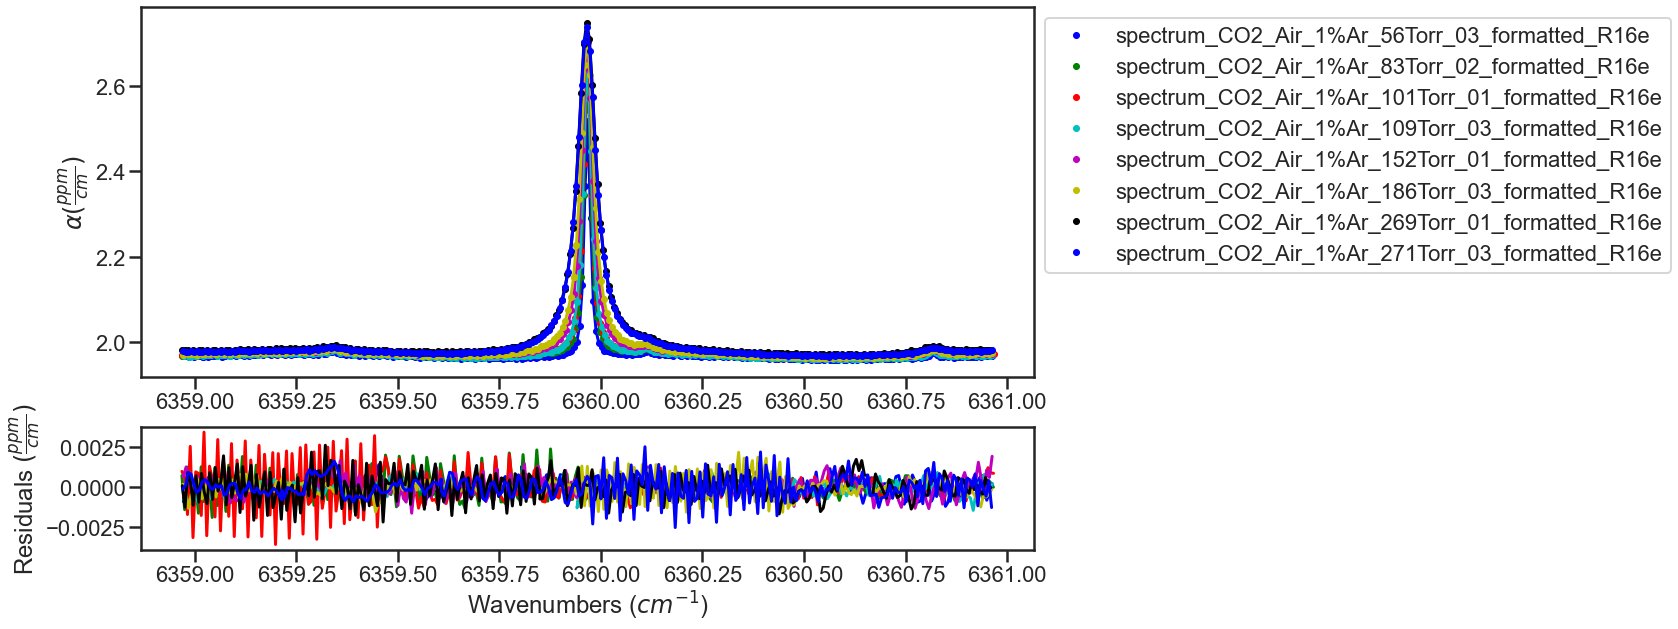

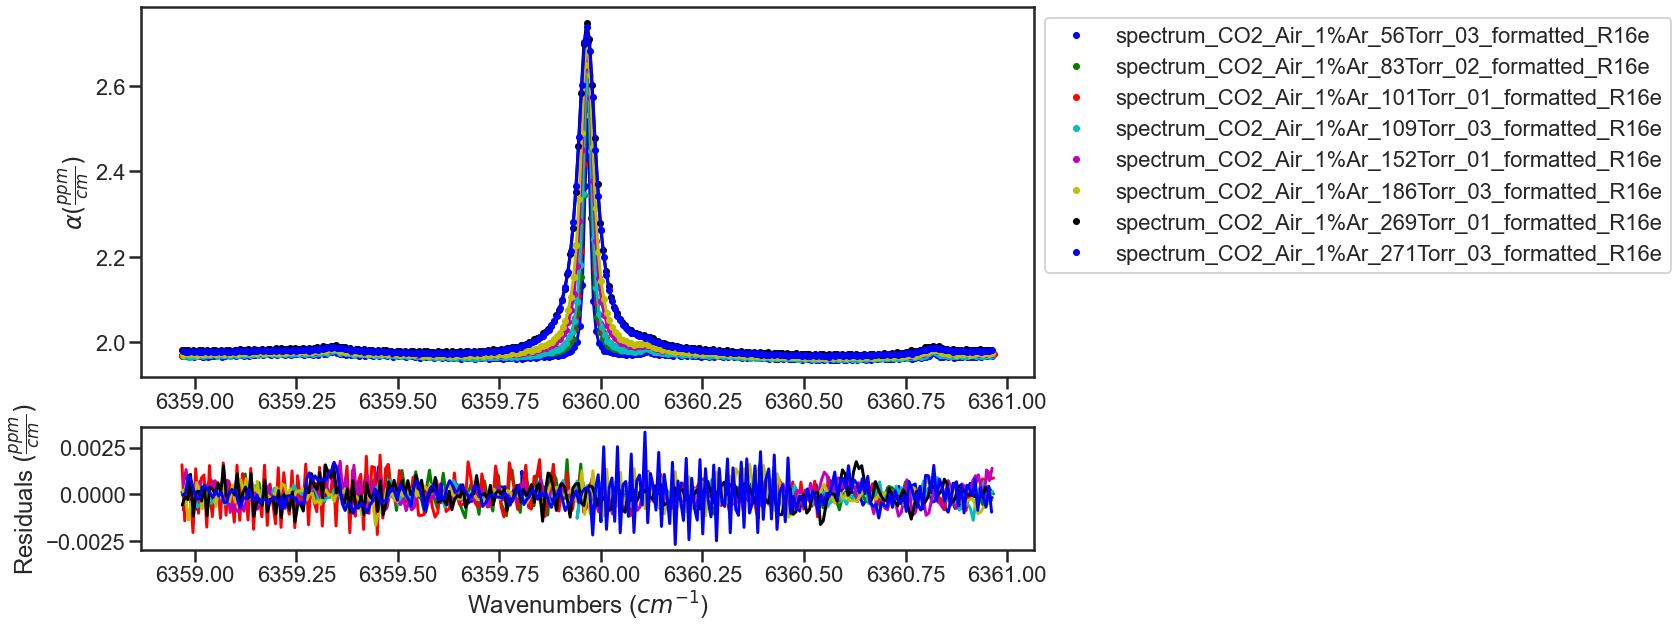

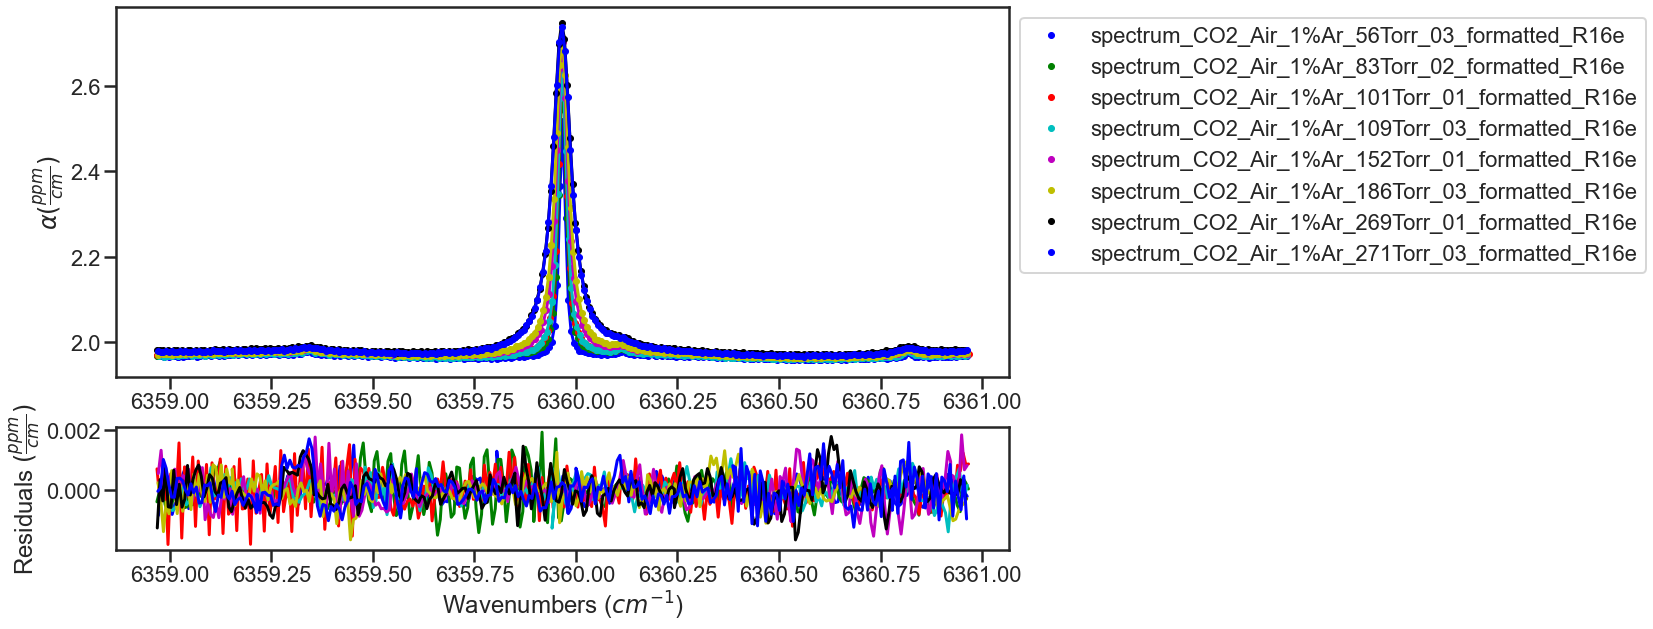

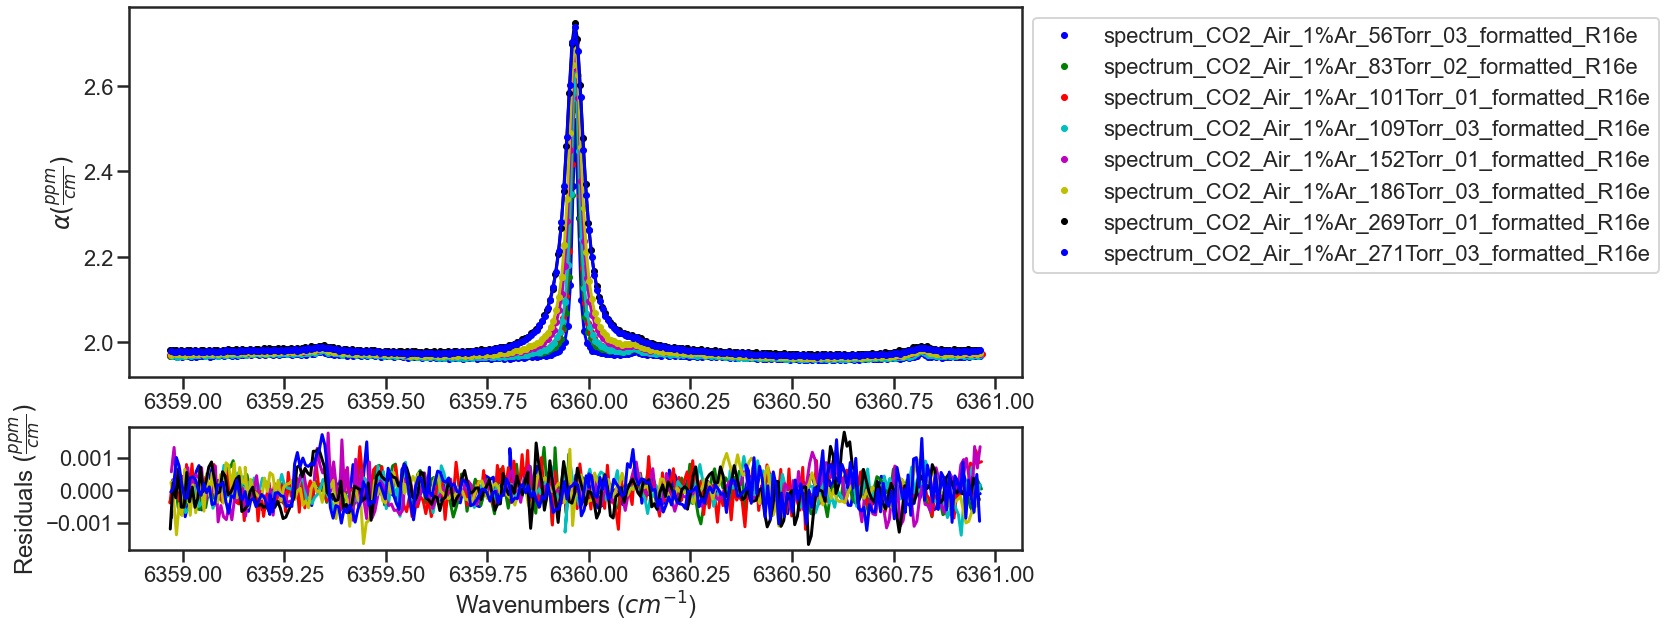

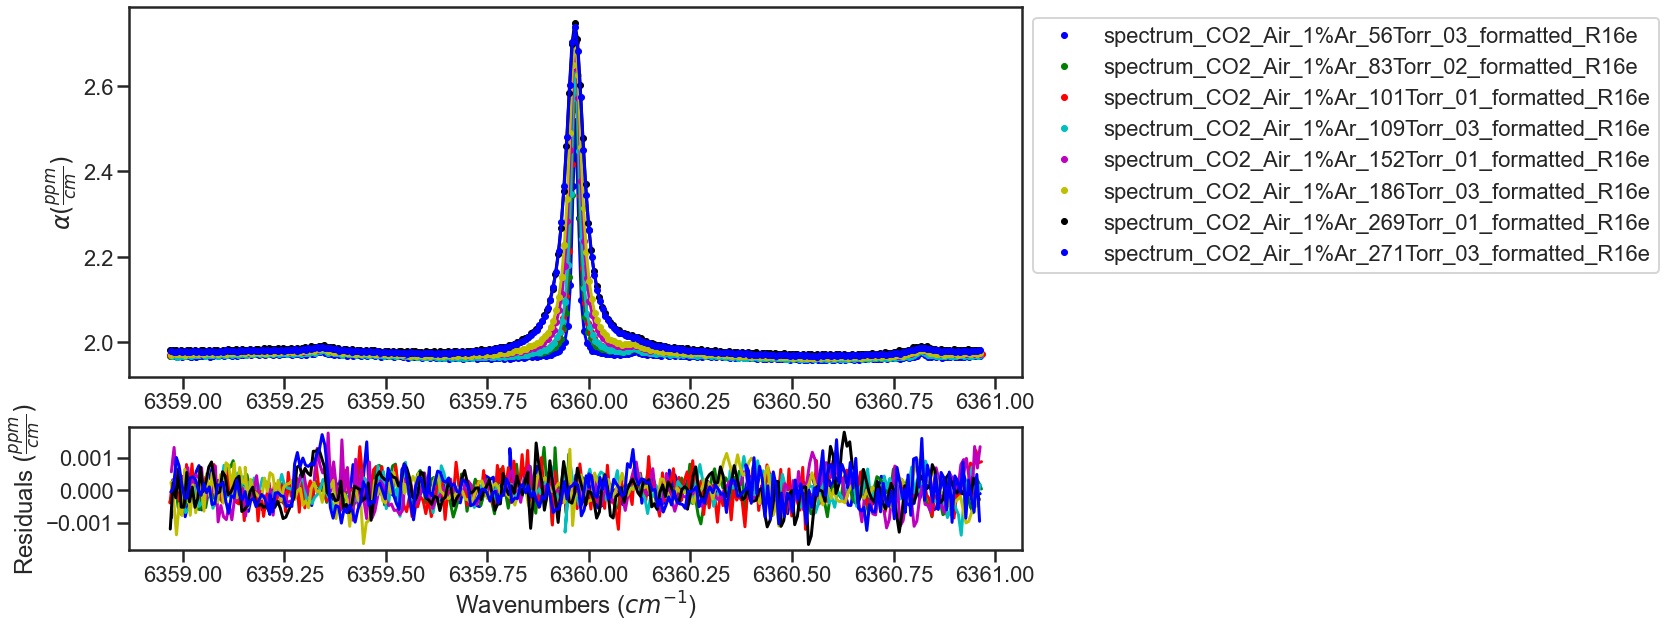

Name                     Value      Min      Max   Stderr     Vary     Expr Brute_Step
Pressure_1_0           0.07375     -inf      inf        0    False     None     None
Pressure_1_1           0.07375     -inf      inf        0    False     None     None
Pressure_1_2           0.07375     -inf      inf        0    False     None     None
Pressure_1_3           0.07375     -inf      inf        0    False     None     None
Pressure_2_0            0.1095     -inf      inf        0    False     None     None
Pressure_2_1            0.1095     -inf      inf        0    False     None     None
Pressure_2_2            0.1095     -inf      inf        0    False     None     None
Pressure_2_3            0.1095     -inf      inf        0    False     None     None
Pressure_3_0            0.1325     -inf      inf        0    False     None     None
Pressure_3_1            0.1325     -inf      inf        0    False     None     None
Pressure_3_2            0.1325     -inf      inf        0    Fa

In [5]:
 
counter = 0
iterations = 5
while counter < iterations:
    fit_data = MATS.Fit_DataSet(SPECTRA,'Baseline_LineList', 'Parameter_LineList', minimum_parameter_fit_intensity = Fit_Intensity)
    params = fit_data.generate_params()




    fit_data.constrained_baseline(params, baseline_segment_constrained = True, xshift_segment_constrained = True, molefraction_segment_constrained = True,
                                        etalon_amp_segment_constrained = False, etalon_period_segment_constrained = True, etalon_phase_segment_constrained = False, 
                                        pressure_segment_constrained = True, temperature_segment_constrained = True)


    minimum_segment_spec_1 = spec_1.segments.min()


    for param in params:

        if 'etalon_1_period_' in param:
            #Sets the period of etalon_1 to be equal for all spectra
            if param != 'etalon_1_period_1_' + str(int(minimum_segment_spec_1)):
                params[param].set(expr='etalon_1_period_1_' + str(int(minimum_segment_spec_1)))
        if 'etalon_1_phase_' in param:
            #Constrains the phase of etalon_1 across each spectrum
            start_ =  (param.find('_', 9))
            end_ =  (param.find('_', param.find('_', 9) + 1))
            spectrum_number = str(param[start_ + 1:end_])

            if param != 'etalon_1_phase_'+spectrum_number + '_' + str(int(minimum_segment_spec_1)):
                params[param].set(expr= 'etalon_1_phase_'+spectrum_number + '_' + str(int(minimum_segment_spec_1)))

        if 'etalon_2_period_' in param:
            #Sets the period of etalon_1 to be equal for all spectra
            if param != 'etalon_2_period_1_' + str(int(minimum_segment_spec_1)):
                params[param].set(expr='etalon_2_period_1_' + str(int(minimum_segment_spec_1)))

        if 'etalon_3_period_' in param:
            #Sets the period of etalon_1 to be equal for all spectra
            if param != 'etalon_3_period_1_' + str(int(minimum_segment_spec_1)):
                params[param].set(expr='etalon_3_period_1_' + str(int(minimum_segment_spec_1)))


    result = fit_data.fit_data(params, wing_cutoff = 25)
    

    fit_data.residual_analysis(result, indv_resid_plot=False)
    fit_data.update_params(result)
    SPECTRA.generate_summary_file(save_file = True)
    SPECTRA.plot_model_residuals()
    counter+=1
    
    if counter == iterations:
        print (result.params.pretty_print())
    




## Compare to Literature Result
The Lin et al. work reported spectra with QFs between 11000 and 29000 for pressures between 1.33kPa and 26.7kPa.  The current example work was conducted over a slightly higher pressure range of  7.5 to 36 kPa and had QFs of about 1500.

The Lin work reports uncertainty on the collisional broadening of 0.1%, the pressure shift of 0.35%, the speed-dependent broadening of 0.2%, the speed-dependent shift of 20%, and the Dicke narrowing of 1%.  The code below compares the results from the Lin et al and current fit example including a plot highlighting the reported relative uncertainty in line shape parameters reported by the fits.  The current example shows much higher fit uncertainties for speed-dependent width and Dicke narrowing, which indicates that at this QF and pressure range the spectra used in this analysis have a difficult time distinguishing between these narrowing mechanisms.  This motivates a Monte Carlo analysis that answers the question how would improving the SNR and pressure range improve the uncertainty in the reported line shape parameters.    


C:\Users\ema3\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator


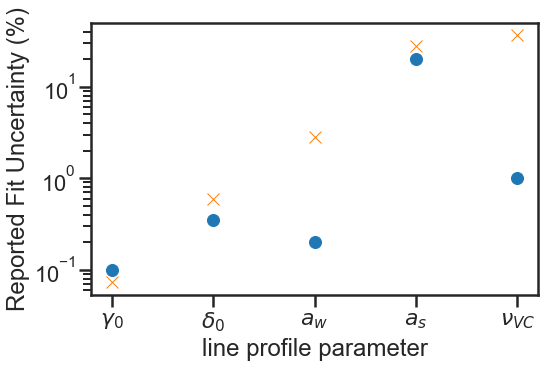

,Parameters,Lin et al. Value,Lin et al. Uncertainty (%),Fit Value,Fit Uncertainty (%),Fit Percent Difference (%)
0,gamma0_air,0.074492,0.10,0.074399,0.072829,-0.124604
1,delta0_air,-0.005408,0.35,-0.005407,0.598812,-0.008841
2,SD_gamma_air,0.088400,0.20,0.094939,2.788409,6.887772
3,SD_delta_air,0.055000,20.00,0.057652,27.792124,4.600130
4,nuVC_air,0.003099,1.00,0.001806,36.417243,-71.636851


In [6]:
Compare_Results = pd.DataFrame()
Compare_Results['Parameters'] = ['gamma0_air', 'delta0_air', 'SD_gamma_air', 'SD_delta_air', 'nuVC_air']

#Get Spectra line number from the parameter results list.  Alternatively, could read in the Linelist file and parse the same way as the initial Parameter linelist
for param in result.params:
    if ('SD_gamma' in param) and (result.params[param].vary == True):
        line_number = param.replace('SD_gamma_air_line_', '')


for parameter in Compare_Results['Parameters'].unique():
    # Get Lin et al Parameter values and uncertainties
    Compare_Results.loc[Compare_Results['Parameters'] == parameter, 'Lin et al. Value'] =  PARAM_LINELIST[(PARAM_LINELIST['local_lower_quanta']=='R16e') & (PARAM_LINELIST['global_upper_quanta']==30012)][parameter].values[0]
    lin_reported_uncertainty = {'gamma0_air':0.1, 'delta0_air':0.35, 'SD_gamma_air':0.2, 'SD_delta_air':20, 'nuVC_air':1}
    Compare_Results.loc[Compare_Results['Parameters'] == parameter, 'Lin et al. Uncertainty (%)'] =  lin_reported_uncertainty[parameter]
    
    # Get Parameter results from fitting
    Compare_Results.loc[Compare_Results['Parameters'] == parameter, 'Fit Value'] =  result.params[parameter + '_line_' + line_number].value
    Compare_Results.loc[Compare_Results['Parameters'] == parameter, 'Fit Uncertainty (%)'] =  100*np.abs(result.params[parameter + '_line_' + line_number].stderr / result.params[parameter + '_line_' + line_number].value)


Compare_Results['Fit Percent Difference (%)'] = 100*(Compare_Results['Fit Value'] - Compare_Results['Lin et al. Value']) / Compare_Results['Fit Value']


plt.figure(figsize=(8,5))


plt.semilogy(Compare_Results['Parameters'], Compare_Results['Lin et al. Uncertainty (%)'].values, 'o',label='Lin et al. (2015)')
plt.semilogy(Compare_Results['Parameters'], Compare_Results['Fit Uncertainty (%)'].values,  'x',label='Current Example')
ax = plt.gca()
ax.set_xticklabels(['$\gamma_{0}$', '$\delta_{0}$', '$a_{w}$', '$a_{s}$', '$\\nu_{VC}$' ])
plt.xlabel('line profile parameter')
plt.ylabel('Reported Fit Uncertainty (%)')

#plt.bar(Compare_Results['Parameters'], Compare_Results['Lin et al. Percent Difference (%)'])
#plt.errorbar(Compare_Results['Parameters'], Compare_Results['Lin et al. Percent Difference (%)'], yerr=Compare_Results['Lin et al. Uncertainty (%)'], fmt="o", color="r")

plt.show()

Compare_Results

## Monte Carlo Analysis

The Monte Carlo uncertainty analysis involves running numerous iterations fitting synthetic spectra at experimental conditions.  To simplify the analysis the simulation line list only includes the R16e line and will use the results of the experimental fits as the simulation values.  Additionally, a dataframe summarizing the pressures and SNR (approximated by the QF from fits to the experimental spectra) are necessary for defining the simulation conditions.  In this analysis we are comparing the synthetic results at experimetnal conditions, to those with three addtional low pressure spectra and with SNR of 5000 (about three times larger than observed in the experimental spectra).

In [7]:
# Generate linelist only using the R16e line and using the results from the experimental fits
SIMULATION_LINELIST = PARAM_LINELIST[(PARAM_LINELIST['local_lower_quanta']=='R16e') & (PARAM_LINELIST['global_upper_quanta']==30012)].copy()
SIMULATION_LINELIST.reset_index(inplace = True)


SIMULATION_LINELIST.loc[SIMULATION_LINELIST.index ==0, 'gamma0_air'] = result.params['gamma0_air_line_' + line_number].value
SIMULATION_LINELIST.loc[SIMULATION_LINELIST.index == 0, 'delta0_air'] = result.params['delta0_air_line_' + line_number].value
SIMULATION_LINELIST.loc[SIMULATION_LINELIST.index == 0, 'nuVC_air'] = result.params['nuVC_air_line_' + line_number].value
SIMULATION_LINELIST.loc[SIMULATION_LINELIST.index == 0, 'SD_gamma_air'] = result.params['SD_gamma_air_line_' + line_number].value
SIMULATION_LINELIST.loc[SIMULATION_LINELIST.index == 0, 'SD_delta_air'] = result.params['SD_delta_air_line_' + line_number].value
SIMULATION_LINELIST.loc[SIMULATION_LINELIST.index == 0, 'y_air_296'] = 0
SIMULATION_LINELIST['nuVC_air']


0    0.001806
Name: nuVC_air, dtype: float64

In [8]:
# Pressure and QF of Fit Results for Simulation at Experiment Conditions
Exp_Simulation_conditions = pd.DataFrame()
Exp_Simulation_conditions['Spectrum Number'] = SPECTRA.get_list_spectrum_numbers()
for spec in SPECTRA.spectra:
    Exp_Simulation_conditions.loc[Exp_Simulation_conditions['Spectrum Number']==spec.spectrum_number,'SNR']=spec.calculate_QF()
    Exp_Simulation_conditions.loc[Exp_Simulation_conditions['Spectrum Number']==spec.spectrum_number,'Pressures']= np.around(spec.get_pressure_torr())
    
New_Simulation_conditions = Exp_Simulation_conditions.copy()
New_Simulation_conditions['SNR'] = 5000
new_pressures = pd.DataFrame(data = {'Pressures' : [5, 10, 25], 'SNR': [5000, 5000, 5000]})
New_Simulation_conditions = New_Simulation_conditions.append(new_pressures)


In [9]:
gamma0_err = Compare_Results[Compare_Results['Parameters'] == 'gamma0_air']['Fit Uncertainty (%)'].values[0]/100 #per
delta0_err = Compare_Results[Compare_Results['Parameters'] == 'delta0_air']['Fit Uncertainty (%)'].values[0]/100 #per
aw_err = Compare_Results[Compare_Results['Parameters'] == 'SD_gamma_air']['Fit Uncertainty (%)'].values[0]/100#per
as_err = Compare_Results[Compare_Results['Parameters'] == 'SD_delta_air']['Fit Uncertainty (%)'].values[0]/100 #per
nuVC_err = Compare_Results[Compare_Results['Parameters'] == 'nuVC_air']['Fit Uncertainty (%)'].values[0]/100 #per


In [10]:
def gen_spec(simulation_conditions, i, simulation_linelist):
    sample_molefraction =  {2:0.0004254}
    wave_min = 6358.972 #cm-1
    wave_max = 6360.963 #cm-1
    wave_space = 0.006772 #cm-1
    wave_error = 4.67e-7
    
    etalons = {1:[0.004321,1.168], 2:[0.001377, 59.38], 3:[0.0004578, 29.75]}

    spec = MATS.simulate_spectrum(simulation_linelist, 
                             baseline_terms = [0,0],
                            wave_min = wave_min, wave_max = wave_max,  wave_space = wave_space, wave_error = wave_error,
                            SNR = simulation_conditions['SNR'].values[i], etalons = etalons, 
                            temperature = 23.25,
                            pressure = simulation_conditions['Pressures'].values[i], 
                            wing_cutoff = 25,  wing_method = 'wing_cutoff', 
                            filename = str(int(simulation_conditions['Pressures'].values[i])) + 'torr', 
                            molefraction = sample_molefraction, 
                            natural_abundance = True, nominal_temperature = 296, IntensityThreshold = 1e-30, num_segments = 1)
    return spec


The mc_ function defined below simply takes the simulation conditions and number of iterations as inputs.  Spectra are simulated at the experimental conditions for just the R16e line using the linelist determined from the fits to the experimental spectra.  The inital guesses for the fitting are perturbed randomly at the magnitude of the reported fit error of the fits to the experimental data.  The fits are conducted in the same manner as those to the experimental data without the use of the segment function.  Results from each iteration are saved the MC_result file.  

In [13]:
def mc_(iterations, simulation_conditions, MC_result_file):
    '''
    Runs the MC simulation for given number of iterations using the pressures and SNR defined in simulation condition dataframe for the R16e line and saves results to file
    '''
    MC_Results = pd.DataFrame()
    MC_Results['Iterations'] = np.arange(0, iterations)
    MC_Results['gamma0_air'] = SIMULATION_LINELIST['gamma0_air'].values[0]
    MC_Results['delta0_air'] = SIMULATION_LINELIST['delta0_air'].values[0]
    MC_Results['SD_gamma_air'] = SIMULATION_LINELIST['SD_gamma_air'].values[0]
    MC_Results['SD_delta_air'] = SIMULATION_LINELIST['SD_delta_air'].values[0]
    MC_Results['nuVC_air'] = SIMULATION_LINELIST['nuVC_air'].values[0]
    MC_Results['y_air_296'] = SIMULATION_LINELIST['y_air_296'].values[0]

    for iteration in np.arange(0, iterations):

        #Read in Possible linelists
        PARAM_LINELIST = SIMULATION_LINELIST.copy()

        if len(simulation_conditions) ==8:
            spec_1 = gen_spec(simulation_conditions, 0, SIMULATION_LINELIST)
            spec_2 = gen_spec(simulation_conditions, 1, SIMULATION_LINELIST)
            spec_3 = gen_spec(simulation_conditions, 2, SIMULATION_LINELIST)
            spec_4 = gen_spec(simulation_conditions, 3, SIMULATION_LINELIST)
            spec_5 = gen_spec(simulation_conditions, 4, SIMULATION_LINELIST)
            spec_6 = gen_spec(simulation_conditions, 5, SIMULATION_LINELIST)
            spec_7 = gen_spec(simulation_conditions, 6, SIMULATION_LINELIST)
            spec_8 = gen_spec(simulation_conditions, 7, SIMULATION_LINELIST)
            SPECTRA = MATS.Dataset([spec_1, spec_2, spec_3, spec_4, spec_5, spec_6, spec_7, spec_8], 'Monte Carlo Analysis',PARAM_LINELIST) 
        elif len(simulation_conditions) == 11:
            spec_1 = gen_spec(simulation_conditions, 0, SIMULATION_LINELIST)
            spec_2 = gen_spec(simulation_conditions, 1, SIMULATION_LINELIST)
            spec_3 = gen_spec(simulation_conditions, 2, SIMULATION_LINELIST)
            spec_4 = gen_spec(simulation_conditions, 3, SIMULATION_LINELIST)
            spec_5 = gen_spec(simulation_conditions, 4, SIMULATION_LINELIST)
            spec_6 = gen_spec(simulation_conditions, 5, SIMULATION_LINELIST)
            spec_7 = gen_spec(simulation_conditions, 6, SIMULATION_LINELIST)
            spec_8 = gen_spec(simulation_conditions, 7, SIMULATION_LINELIST)
            spec_9 = gen_spec(simulation_conditions, 8, SIMULATION_LINELIST)
            spec_10 = gen_spec(simulation_conditions, 9, SIMULATION_LINELIST)
            spec_11 = gen_spec(simulation_conditions, 10, SIMULATION_LINELIST)
            SPECTRA = MATS.Dataset([spec_1, spec_2, spec_3, spec_4, spec_5, spec_6, spec_7, spec_8, spec_9, spec_10, spec_11], 'Monte Carlo Analysis',PARAM_LINELIST) 
        

    
            


        #Generate Baseline Parameter list based on number of etalons in spectra definitions and baseline order
        BASE_LINELIST = SPECTRA.generate_baseline_paramlist()
        
        
        gamma0_err = Compare_Results[Compare_Results['Parameters'] == 'gamma0_air']['Fit Uncertainty (%)'].values[0]/100 #per
        delta0_err = Compare_Results[Compare_Results['Parameters'] == 'delta0_air']['Fit Uncertainty (%)'].values[0]/100 #per
        aw_err = Compare_Results[Compare_Results['Parameters'] == 'SD_gamma_air']['Fit Uncertainty (%)'].values[0]/100#per
        as_err = Compare_Results[Compare_Results['Parameters'] == 'SD_delta_air']['Fit Uncertainty (%)'].values[0]/100 #per
        nuVC_err = Compare_Results[Compare_Results['Parameters'] == 'nuVC_air']['Fit Uncertainty (%)'].values[0]/100 #per
        

        PARAM_LINELIST.loc[PARAM_LINELIST['molec_id'] == 2, 'gamma0_air'] = PARAM_LINELIST[PARAM_LINELIST['molec_id']==2]['gamma0_air'].values*(1 + np.random.normal(loc = 0, scale =1, size = len(PARAM_LINELIST[PARAM_LINELIST['molec_id']==2]['sw']))*gamma0_err)
        PARAM_LINELIST.loc[PARAM_LINELIST['molec_id'] == 2, 'delta0_air'] = PARAM_LINELIST[PARAM_LINELIST['molec_id']==2]['delta0_air'].values*(1 + np.random.normal(loc = 0, scale =1, size = len(PARAM_LINELIST[PARAM_LINELIST['molec_id']==2]['sw']))*delta0_err)
        PARAM_LINELIST.loc[PARAM_LINELIST['molec_id'] == 2, 'SD_gamma_air'] = PARAM_LINELIST[PARAM_LINELIST['molec_id']==2]['SD_gamma_air'].values*(1 + np.random.normal(loc = 0, scale =1, size = len(PARAM_LINELIST[PARAM_LINELIST['molec_id']==2]['sw']))*aw_err)
        PARAM_LINELIST.loc[PARAM_LINELIST['molec_id'] == 2, 'SD_delta_air'] = PARAM_LINELIST[PARAM_LINELIST['molec_id']==2]['SD_delta_air'].values*(1 + np.random.normal(loc = 0, scale =1, size = len(PARAM_LINELIST[PARAM_LINELIST['molec_id']==2]['sw']))*as_err)
        PARAM_LINELIST.loc[PARAM_LINELIST['molec_id'] == 2, 'nuVC_air'] = PARAM_LINELIST[PARAM_LINELIST['molec_id']==2]['nuVC_air'].values*(1 + np.random.normal(loc = 0, scale =1, size = len(PARAM_LINELIST[PARAM_LINELIST['molec_id']==2]['sw']))*nuVC_err)



        FITPARAMS = MATS.Generate_FitParam_File(SPECTRA, PARAM_LINELIST, BASE_LINELIST, lineprofile = 'SDNGP', linemixing = False, 
                                                  fit_intensity = Fit_Intensity, threshold_intensity = IntensityThreshold, sim_window = wave_range,
                                                  nu_constrain = True, sw_constrain = False, gamma0_constrain = True, delta0_constrain = True, 
                                                   aw_constrain = True, as_constrain = True, 
                                                   nuVC_constrain = True, eta_constrain =True, linemixing_constrain = True,
                                                    additional_columns = ['local_lower_quanta'])



        FITPARAMS.generate_fit_param_linelist_from_linelist(vary_nu = {2:{1:True}}, vary_sw = {2:{1:True}},
                                                         vary_gamma0 = {2:{1: True}},
                                                         vary_delta0 = {2:{1: True}},
                                                         vary_aw = {2:{1: True}},
                                                         vary_as = {2:{1: True}},
                                                         vary_nuVC = {2:{1:True}},
                                                         vary_eta = {}, vary_linemixing = {2:{1:False}})
        FITPARAMS.generate_fit_baseline_linelist(vary_baseline = True, vary_molefraction = {2:False}, vary_pressure = False, vary_temperature = False, vary_xshift = False, 
                                                vary_etalon_amp= True, vary_etalon_period= True, vary_etalon_phase= True)


        fit_data = MATS.Fit_DataSet(SPECTRA,'Baseline_LineList', 'Parameter_LineList', minimum_parameter_fit_intensity = Fit_Intensity)
        params = fit_data.generate_params()


        result = fit_data.fit_data(params, wing_cutoff = 25)

        fit_data.residual_analysis(result, indv_resid_plot=False)
        fit_data.update_params(result)
        #SPECTRA.generate_summary_file(save_file = True)
        #SPECTRA.plot_model_residuals()

        
        #line Shape Parameters
        MC_Results.loc[MC_Results['Iterations']== iteration, 'gamma0_air_fit'] =result.params['gamma0_air_line_0'].value
        MC_Results.loc[MC_Results['Iterations']== iteration, 'gamma0_air_fit_err'] =result.params['gamma0_air_line_0'].stderr
        MC_Results.loc[MC_Results['Iterations']== iteration, 'delta0_air_fit'] = result.params['delta0_air_line_0'].value
        MC_Results.loc[MC_Results['Iterations']== iteration, 'delta0_air_fit_err'] = result.params['delta0_air_line_0'].stderr
        MC_Results.loc[MC_Results['Iterations']== iteration, 'nuVC_air_fit'] = result.params['nuVC_air_line_0'].value
        MC_Results.loc[MC_Results['Iterations']== iteration, 'nuVC_air_fit_err'] = result.params['nuVC_air_line_0'].stderr
        MC_Results.loc[MC_Results['Iterations']== iteration, 'SD_gamma_air_fit'] =result.params['SD_gamma_air_line_0'].value
        MC_Results.loc[MC_Results['Iterations']== iteration, 'SD_gamma_air_fit_err'] =result.params['SD_gamma_air_line_0'].stderr
        MC_Results.loc[MC_Results['Iterations']== iteration, 'SD_delta_air_fit'] =result.params['SD_delta_air_line_0'].value
        MC_Results.loc[MC_Results['Iterations']== iteration, 'SD_delta_air_fit_err'] =result.params['SD_delta_air_line_0'].stderr



        MC_Results.loc[MC_Results['Iterations']== iteration, 'QF_1'] = spec_1.calculate_QF()
        MC_Results.loc[MC_Results['Iterations']== iteration, 'QF_2'] = spec_2.calculate_QF()
        MC_Results.loc[MC_Results['Iterations']== iteration, 'QF_3'] = spec_3.calculate_QF()
        MC_Results.loc[MC_Results['Iterations']== iteration, 'QF_4'] = spec_4.calculate_QF()
        MC_Results.loc[MC_Results['Iterations']== iteration, 'QF_5'] = spec_5.calculate_QF()
        MC_Results.loc[MC_Results['Iterations']== iteration, 'QF_6'] = spec_6.calculate_QF()
        MC_Results.loc[MC_Results['Iterations']== iteration, 'QF_7'] = spec_7.calculate_QF()
        MC_Results.loc[MC_Results['Iterations']== iteration, 'QF_8'] = spec_8.calculate_QF()
        if len(simulation_conditions) == 11:
            MC_Results.loc[MC_Results['Iterations']== iteration, 'QF_9'] = spec_9.calculate_QF()
            MC_Results.loc[MC_Results['Iterations']== iteration, 'QF_10'] = spec_10.calculate_QF()
            MC_Results.loc[MC_Results['Iterations']== iteration, 'QF_11'] = spec_11.calculate_QF()
            

        MC_Results.to_csv(MC_result_file + '.csv', index = False)
        



In [14]:
mc_(50, Exp_Simulation_conditions, 'Experimental_Conditions_MC')
mc_(50, New_Simulation_conditions, 'New_Conditions_MC')


The parameter_eval function summarizes the MC results comparing the fit average and standard deviation across the iterations to the reported fit uncertainty on each iteration.  This also calculates the fractional error compared to the simulation value.  Plots of summary and dataframe are generated for visualization.

In [15]:
def parameter_eval(df, report_df):
    '''
    Summarizes MC results for a given parameter
    '''
    params = ['gamma0_air', 'delta0_air', 'SD_gamma_air', 'SD_delta_air', 'nuVC_air']
    fig = plt.figure(constrained_layout=True, figsize = [20,3])
    spec = gridspec.GridSpec(ncols=5, nrows=1, figure=fig)
    ax1 = fig.add_subplot(spec[0, 0])
    ax2 = fig.add_subplot(spec[0,1])
    ax3 = fig.add_subplot(spec[0,2])
    ax4 = fig.add_subplot(spec[0,3])
    ax5 = fig.add_subplot(spec[0,4])
    
    axes = [ax1, ax2, ax3, ax4, ax5]
    count =0
    for simulated_column in params:
        param_avg = df[simulated_column + '_fit'].median()
        param_std = df[simulated_column + '_fit'].std()
        param_err_avg = df[simulated_column + '_fit_err'].median()

        if df[simulated_column].values[0] == 0:
            param_frac_err = 0
            param_fit_err = 0
        else:
            param_frac_err = 100*(param_avg - df[simulated_column].values[0]) / df[simulated_column].values[0]
            param_fit_err = np.abs(100*param_std / param_avg)
        if param_err_avg == 0:
            param_err_ratio = 0
        else:
            param_err_ratio = param_std/param_err_avg

        report_df.loc[report_df['Reported Values']==simulated_column, 'Simulated Value'] = df[simulated_column].values[0]
        report_df.loc[report_df['Reported Values']==simulated_column, 'Parameter Fit Average'] = param_avg
        report_df.loc[report_df['Reported Values']==simulated_column, 'Parameter Fit StDev'] = param_std
        report_df.loc[report_df['Reported Values']==simulated_column, 'Parameter Error Average'] = param_err_avg 
        report_df.loc[report_df['Reported Values']==simulated_column, 'Parameter Fractional Error'] = param_frac_err
        report_df.loc[report_df['Reported Values']==simulated_column, 'Parameter Fit Error'] = param_fit_err
        report_df.loc[report_df['Reported Values']==simulated_column, 'Error Ratio'] = param_err_ratio
        
        ax = axes[count]
        ax.errorbar(df['Iterations'], df[simulated_column + '_fit'], fmt = 'o', yerr = df[simulated_column + '_fit_err'])
        ax.hlines(param_avg, 0, 50)
        ax.hlines(param_avg + param_std, 0, 50, linestyles = 'dashed')
        ax.hlines(param_avg - param_std, 0, 50, linestyles = 'dashed')
        ax.hlines(df[simulated_column].values[0], 0, 50, linestyles = 'dashed', colors = 'r')
        ax.set_title(simulated_column)
        ax.set_xlabel('interations')
        
        ax.ticklabel_format(useOffset=False)
        count+=1
    ax1.set_ylabel('Parameter Value')

    plt.show()
    
    return report_df




The Experimental parameter result table shows good agreement in the fit uncertainty reported in the experimental data and averaged over the iterations of the MC analysis conducted at experimental conditions.  This also provides a measure of the ratio between the standard deviations in the fit values across the iterations compared to the average fit uncertainty.  Ratios greater than one indicate that the fit uncertainty reported by one iteration might under represent the uncertainty, most likely because of correlation between parameters that aren't included in the calculation of the fit uncertainty.  This ratio, when greater than one, could act as a correction factor to increase the experiment fit uncertainty.


By comparing the average fit uncertainties over MC simulations in the new conditions (higher SNR and 3 extra pressures) to the experimental conditions indicate that the proposed improvements to the experiments can be expected to reduce the uncertainties in the spectroscopic parameters by factors of 2.8 to 3.7.  The largest improvement would be to the Dicke narrowing parameter, which is aided by not only the higher SNR, but also by the inclusion of additional low-pressure spectra that fall in a domain where the Dicke narrowing mechanism dominates over the speed-dependent narrowing.  

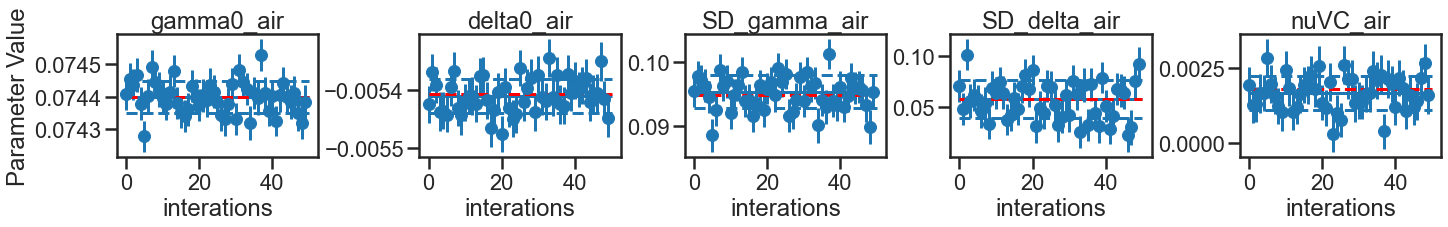

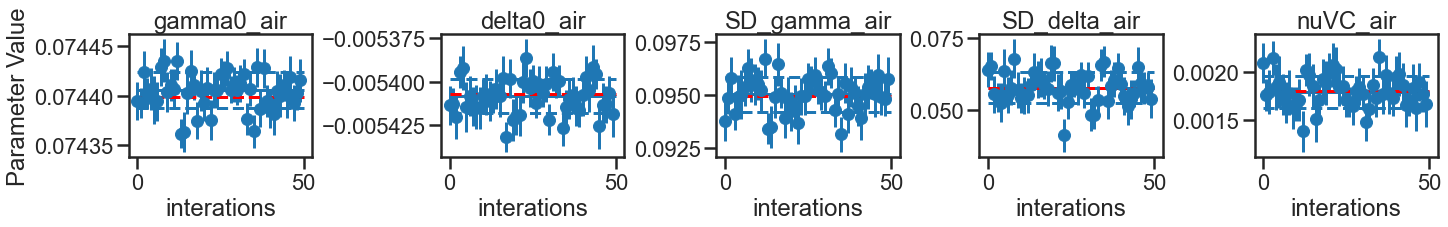

,Reported Values,Simulated Value,Parameter Fit Average,Parameter Fit StDev,Parameter Fractional Error,Parameter Fit Error,Error Ratio,Parameter Error Average
0,gamma0_air,0.074399,0.074400,0.000050,0.001393,0.067188,0.985763,0.000051
1,delta0_air,-0.005407,-0.005411,0.000029,0.073471,0.542051,0.913536,0.000032
2,SD_gamma_air,0.094939,0.095413,0.002568,0.498602,2.691814,1.023063,0.002510
3,SD_delta_air,0.057652,0.057898,0.018668,0.426623,32.242316,1.161376,0.016074
4,nuVC_air,0.001806,0.001647,0.000564,-8.783515,34.216014,0.926340,0.000608


In [16]:
exp_MC = pd.read_csv('Experimental_Conditions_MC.csv')
new_MC = pd.read_csv('New_Conditions_MC.csv')

EXP_SUMMARY = pd.DataFrame()
EXP_SUMMARY['Reported Values'] = ['gamma0_air', 'delta0_air', 'SD_gamma_air', 'SD_delta_air', 'nuVC_air']
EXP_SUMMARY['Simulated Value'] = 0
EXP_SUMMARY['Parameter Fit Average'] = 0
EXP_SUMMARY['Parameter Fit StDev'] = 0
EXP_SUMMARY['Parameter Fractional Error'] = 0
EXP_SUMMARY['Parameter Fit Error'] = 0
EXP_SUMMARY['Error Ratio'] = 0

NEW_SUMMARY = EXP_SUMMARY.copy()

EXP_SUMMARY = parameter_eval(exp_MC, EXP_SUMMARY)
NEW_SUMMARY= parameter_eval(new_MC, NEW_SUMMARY)
EXP_SUMMARY

In [17]:
NEW_SUMMARY['Improvement Over Experiment'] = EXP_SUMMARY['Parameter Fit Error'].values/NEW_SUMMARY['Parameter Fit Error'].values

NEW_SUMMARY

,Reported Values,Simulated Value,Parameter Fit Average,Parameter Fit StDev,Parameter Fractional Error,Parameter Fit Error,Error Ratio,Parameter Error Average,Improvement Over Experiment
0,gamma0_air,0.074399,0.074405,0.000018,0.008798,0.024280,0.959518,0.000019,2.767236
1,delta0_air,-0.005407,-0.005408,0.000010,0.016886,0.183127,0.887421,0.000011,2.959978
2,SD_gamma_air,0.094939,0.095043,0.000821,0.109324,0.864239,0.891607,0.000921,3.114665
3,SD_delta_air,0.057652,0.057801,0.005355,0.258189,9.263983,0.894288,0.005988,3.480395
4,nuVC_air,0.001806,0.001789,0.000168,-0.916053,9.363885,0.785498,0.000213,3.654040
